# Lista 03 - Simulated Anneling

#### 1. Discorra sobre o algoritmo Simulated Annealing - SA, apresentando suas vantagens e desvantagens.

Simulated Annealing (SA) é um algoritmo de busca de vizinhança que é inspirado no estudo de Mecânica Estatística. Partimos de uma solução para o problema e a partir de passos de Monte Carlo passamos de solução em solução até chegarmos ao ótimo local. Nesse algoritmo ao selecionarmos um vizinho dessa solução, se ele for uma solução melhor vamos para esse ponto, caso contrário temos uma probabilidade que segue uma distribuição de Boltzmann para ir. Ou seja, é possível passar de uma solução melhor para uma solução pior do espaço de busca.

A vantagem desse algoritmo também é a sua desvantagem. Nele não guardamos a memória dos passos anteriores e graças a isso é garantido que encontraremos uma solução ótima. Entretanto tabém devido a isso passaremos várias e várias vezes pela mesma solução na qual perderemos tempo nessas repetições. Isso mostra que o SA isolado não é bom, contudo se for implementado aliado à outras Metaheurísticas, pode gerar melhores soluções.

#### 2. Descreva os parâmetros de um algoritmo SA

Os parâmetros de um SA padrão são:

1. **Critério de parada**: número de iterações, tempo, ...
2. **Temperatura Inicial**
3. **Resfriamento da Temperatura**

#### 3. Descreva, em detalhes, as partes constituintes de um algoritmo SA.
Aqui estão os passos para criar um algoritmo Simulated Annealing:

1. Definir o problema de otimização: o primeiro passo é definir o problema de otimização que queremos resolver. Por exemplo, podemos querer encontrar a melhor solução para um problema de roteamento de veículos.

2. Definir a função de custo: a função de custo é a função que mede a qualidade da solução. É importante definir uma função de custo que possa ser avaliada para cada solução candidata.

3. Definir o espaço de solução: o espaço de solução é o conjunto de todas as soluções possíveis para o problema de otimização. É importante definir um espaço de solução que possa ser explorado de forma eficiente.

4. Inicializar a solução: inicialize uma solução candidata aleatória a partir do espaço de solução.

5. Definir a temperatura inicial: a temperatura é um parâmetro chave no algoritmo Simulated Annealing. A temperatura inicial deve ser definida de forma que permita a exploração do espaço de solução.

6. Definir a taxa de resfriamento: a taxa de resfriamento determina como a temperatura é reduzida durante a busca. É importante ajustar a taxa de resfriamento de acordo com a função de custo e o espaço de solução.

7. Executar o loop principal: o loop principal é a parte central do algoritmo Simulated Annealing. Nele, as soluções candidatas são avaliadas, e uma nova solução é gerada a partir da solução atual.

8. Avaliar a solução candidata: avalie a nova solução candidata com a função de custo.

9. Aceitar ou rejeitar a solução candidata: use a temperatura atual para decidir se a nova solução deve ser aceita ou rejeitada. Se a nova solução for melhor que a solução atual, aceite-a. Caso contrário, aceite-a com uma probabilidade que diminui com a temperatura.

10. Resfriar a temperatura: reduza a temperatura de acordo com a taxa de resfriamento.

11. Verificar o critério de parada: verifique se o critério de parada foi atingido. O critério de parada pode ser um número máximo de iterações ou um valor mínimo de temperatura.

12. Retornar a melhor solução encontrada: ao final da execução do algoritmo, retorne a melhor solução encontrada durante a busca.



In [154]:
# Importações das Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import random

In [156]:
# Importação dos valores
Capacity = 524
pesos = """442
252
252
252
252
252
252
252
127
127
127
127
127
106
106
106
106
85
84
46
37
37
12
12
12
10
10
10
10
10
10
9
9"""
Solucao_geral = """1
2
2
3
3
4
4
5
5
5
6
6
6
6
7
7
7
7
7
1
6
7
1
1
1
2
2
3
3
4
4
5
5 """
pesos = np.array(pesos.split("\n")).astype(int)
Solucao_geral = np.array(Solucao_geral.split("\n")).astype(int)
itens = np.arange(len(pesos))

In [157]:
# Aleatorização
a = np.arange(len(itens))
np.random.shuffle(a)
pesos = pesos[a]
Solucao_geral = Solucao_geral[a]
itens = itens[a]

In [158]:
#Gerando a Solução inicial

def generate_solution(pesos,Capacity):
    """
    A solução inicial é gerada a partir do seguinte método: 
    1. Coloco item em um bin;
    2. Checo se a soma dos pesos d bin viola a capacidade, se sim ele fica, caso contrário coloca em outro;
    3. Repito até colocar todos os itens
    """
    Solução_Inicial = {}
    Capacidade = np.arange(len(pesos))

    for k in range(len(pesos)):
        i = pesos[k]
        rep = 1
        if(len(Solução_Inicial) == 0):
            Solução_Inicial[0] = []
            Solução_Inicial[0].append(i)
            continue
        for j in range(len(Solução_Inicial)):
            if(sum(Solução_Inicial[j])+i < Capacity):
                rep = 0
                break
        if(j+rep not in Solução_Inicial.keys()):
            Solução_Inicial[j+rep] = []
        Solução_Inicial[j+rep].append(i)
        Capacidade[k] = j+1
    return np.array(Capacidade)

In [201]:
def Aptidao(Solucao,pesos,Capacity):
    # Cálculo da aptidão usando as perdas
    gasto = np.array([np.sum(pesos[Solucao == i]) for i in np.unique(Solucao)])
    return np.sum((gasto - Capacity)**2)/Capacity

In [195]:
def resfriamento(T,alpha):
    # Função de Resfriamento
    return T/(1+alpha*T)

In [160]:
def generate_candidato(Solução,pesos,Capacity,tipo = 'random'):
    #Aqui gera um novo candidato baseado em uma solução anterior
    if(tipo == 'random'):
        # Aqui pegamos um item da solução e jogamos em um bin aleatório
        pessoa = random.randint(0, len(Solução)-1)
        Solução_parcial = np.copy(Solução)
        bin = random.randint(0, len(Solução_parcial))
        Solução_parcial[pessoa] = bin
        if(np.sum(pesos[Solução_parcial == bin]) > Capacity):
            return generate_candidato(Solução,pesos,Capacity,'random')
        return Solução_parcial
    
    elif(tipo == 'swap'):
        # Aqui fazemos a troca de dois itens em bins diferentes
        Solução_parcial = np.copy(Solução)
        x1,x2 = random.randint(0, len(Solução_parcial)-1),random.randint(0, len(Solução_parcial)-1)
        bin1 = Solução_parcial[x1]
        bin2 = Solução_parcial[x2]
        if(bin1==bin2):
            return generate_candidato(Solução,pesos,Capacity,'swap')
        Solução_parcial[x1] = bin2
        Solução_parcial[x2] = bin1
        if((np.sum(pesos[Solução_parcial == bin1]) > Capacity) or (np.sum(pesos[Solução_parcial == bin2]) > Capacity)):
            return generate_candidato(Solução,pesos,Capacity,'swap')
        return Solução_parcial

In [190]:
def Simulated_Anneling(S0,T,pesos,Capacity,alpha,n_iter,condition = 'max',candidato = "swap",restart =False):
    simulacoes = 0
    time = []

    while(simulacoes != n_iter):
        # Gerando a nova solução
        S = generate_candidato(S0,pesos,Capacity,candidato)

        #Cálculo das Energias
        E1 = Aptidao(S0,pesos,Capacity)
        E2 = Aptidao(S,pesos,Capacity)

        #Cálculo da probabilidade
        prob = np.exp(-(E2 - E1)/T)

        # Checagem se aceitamos a nova solução
        c = E2 > E1 if(condition == 'max') else E1 < E2
        if(c or (prob>=random.random() )):
            S0 = S
        
        # Resfriamos a temperatura
        T = resfriamento(T,alpha)

        simulacoes += 1
        time.append([simulacoes,Aptidao(S0,pesos,Capacity),T])

        # Se restart existir, faremos isso
        if(simulacoes > 2000):
            if((np.abs(np.mean(time[1][100:]) - np.mean(time[1][200:])) < 10) & (restart)):
                return Simulated_Anneling(S0,T,pesos,Capacity,alpha,n_iter,condition,candidato,restart)
           
    time = np.array(time).T
    return time,S0

In [213]:
#Passando valores para o algoritmo
T = 10000
n_iter = 3000
S0 = generate_solution(pesos,Capacity)
time,Solucao = Simulated_Anneling(S0,T,pesos,Capacity,0.9,n_iter,'min','swap',True)

/tmp/ipykernel_427070/1311593085.py:14: RuntimeWarning: overflow encountered in exp
  prob = np.exp(-(E2 - E1)/T)


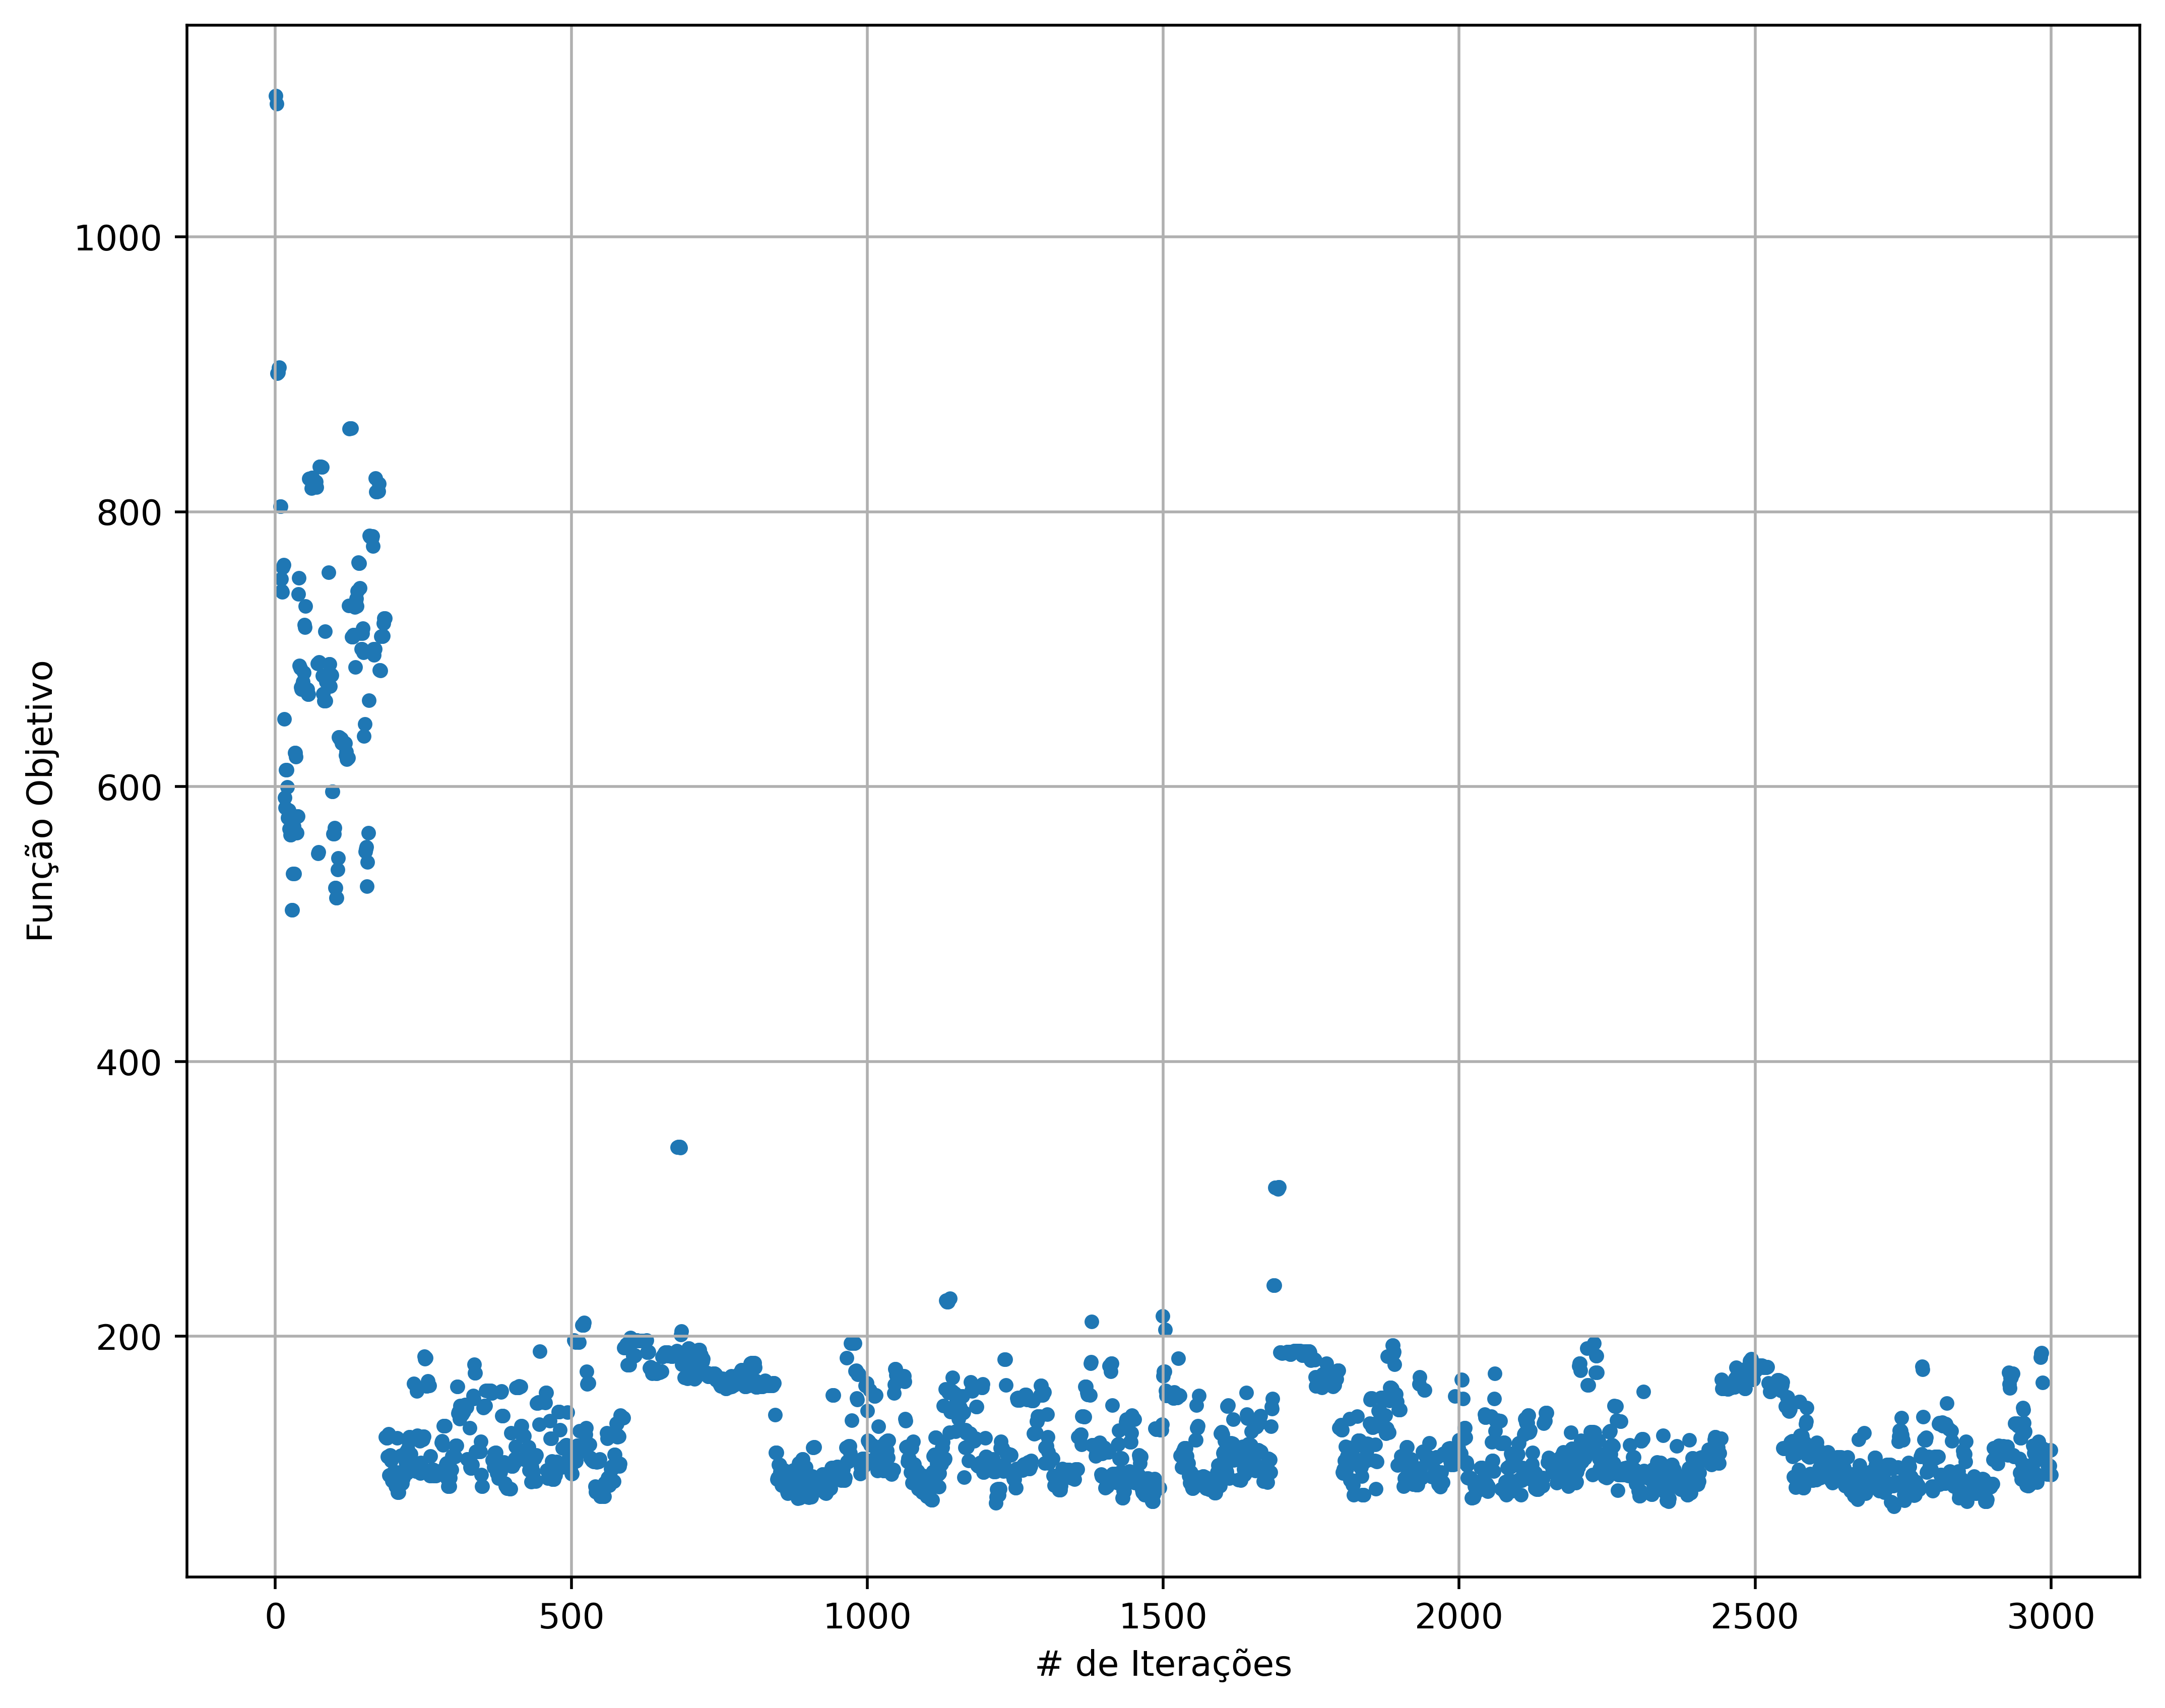

In [218]:
plt.figure(figsize=(10,8),dpi = 500)
plt.scatter(time[0],time[1],s = 10)
plt.ylabel("Função Objetivo")
plt.xlabel('# de Iterações')
plt.savefig("./SA.png")
plt.grid()
plt.show()

In [217]:
print("A Solução encontrada foi:", Solucao)
print("A Solução Ótima é:", Solucao_geral)
print("Soma dos pesos da Solução encontrada:",[np.sum(pesos[Solucao == i]) for i in np.unique(Solucao)])
print("Soma dos pesos da Solução Ótima:",[np.sum(pesos[Solucao_geral == i]) for i in np.unique(Solucao_geral)])
print("Capacidade é de:",Capacity)

A Solução encontrada foi: [4 6 6 2 5 2 1 3 1 4 3 3 4 3 6 5 6 0 4 5 2 2 1 4 2 2 7 3 1 3 4 7 4]
A Solução Ótima é: [5 2 4 3 5 2 4 7 7 2 5 3 1 1 7 4 6 1 6 6 5 7 6 1 2 1 3 3 4 5 7 6 7]
Soma dos pesos da Solução encontrada: [442, 473, 399, 517, 499, 506, 453, 379]
Soma dos pesos da Solução Ótima: [524, 524, 524, 524, 524, 524, 524]
Capacidade é de: 524
